In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import os 

In [11]:
class SPDRePCA:
    def __init__(self, spd_data, n_components):
        self.data = spd_data
        self.n_components = n_components
        self._pca = PCA(n_components=self.n_components)
        self.wavelengths = np.arange(360, 831)
        self.mu = np.array([415, 445, 480, 515, 555, 590, 630, 680])
        self.sigma = np.array([11.0403, 12.7388, 15.2866, 16.5605, 16.5605, 16.9851, 21.2314, 22.0807])

    def Reconstructed_spectrum(self):
        self.scores = self._pca.fit_transform(self.data)
        self.filters = np.zeros((len(self.mu), len(self.wavelengths)))
        for i in range(8):
            self.filters[i] = np.exp(-0.5 * ((self.wavelengths - self.mu[i]) / self.sigma[i])**2)
        self.M = np.dot(self.filters, self.scores)
        self.response_matrix = np.dot(self.filters, self.data)
        self.mean_response = np.mean(self.response_matrix, axis=1)
        self.mean_response = self.mean_response.reshape(-1, 1)
        self.M_inv = np.linalg.inv(self.M)
        response_diff = self.response_matrix - self.mean_response
        self.a_hat = np.dot(self.M_inv, response_diff)
        mean_spd = np.mean(self.data, axis=1)
        self.reconstructed_spectrum = np.dot(self.scores, self.a_hat) + mean_spd[:, np.newaxis]

    def Evaluate(self, Light, save_path=None):
        s = self.data[:, Light]
        s_re = self.reconstructed_spectrum[:, Light]
        MAE = np.mean(np.absolute(s - s_re))
        RMSE = np.sqrt(np.mean(np.square(s - s_re)))
        RRMSE = RMSE / np.mean(s_re)

        # GFC
        num = abs(np.sum(s * s_re))
        denom_s = np.sqrt(np.sum(s ** 2) + 1e-9)
        denom_s_re = np.sqrt(np.sum(s_re ** 2) + 1e-9)
        GFC = num / (denom_s * denom_s_re)

        if save_path:
            with open(save_path, 'a') as f:
                f.write(f"Light: {Light + 1}\n")
                f.write(f"MAE: {MAE}\n")
                f.write(f"RMSE: {RMSE}\n")
                f.write(f"RRMES: {RRMSE}\n")
                f.write(f"GFC: {GFC}\n\n")
            print(f"Results saved to {save_path}")

    def Plot(self, Light, save_path=None):
        # 创建一个包含三个子图的图像
        fig, axs = plt.subplots(3, 1)
        s = self.data[:, Light]
        r = self.reconstructed_spectrum[:, Light]

        # 绘制真实光谱图
        axs[0].plot(self.wavelengths, s, label='True Spectrum')
        axs[0].set_xlabel('Wavelength (nm)')
        axs[0].set_ylabel('Intensity')
        axs[0].set_title('True Spectrum vs Reconstructed Spectrum')
        axs[0].legend()

        # 绘制重建光谱图
        axs[1].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[1].set_xlabel('Wavelength (nm)')
        axs[1].set_ylabel('Intensity')
        axs[1].legend()

        # 绘制重建光谱和真实光谱叠加的图
        axs[2].plot(self.wavelengths, s, label='True Spectrum')
        axs[2].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[2].set_xlabel('Wavelength (nm)')
        axs[2].set_ylabel('Intensity')
        axs[2].legend()

        if save_path:
            file_name = f"Light_s{Light + 1}.png"
            plt.savefig(os.path.join(save_path, file_name))

        plt.tight_layout()
        plt.show()

In [12]:
spd = np.load("/Users/dongtianchi/Documents/GIT/SpectralReconstruction/ComputationalSpectrometers/MachineLearning/cleandata.npy", allow_pickle= True)

In [13]:
r = SPDRePCA(spd,8)

In [14]:
r.Reconstructed_spectrum()

In [12]:
with open('output_PCA/results.txt', 'w') as f:
    f.write('')

Light_list = [0,3,300,1000,1493] 

for i in Light_list:
    r.Evaluate(i, "output_PCA/results.txt")

MAE:  0.0017666263824718668
RMSE:  0.002475050774710134
RRMES:  0.3613375774213259
GFC:  0.9781012898055019
Results saved to output_PCA/results.txt
MAE:  0.0013469128682372794
RMSE:  0.0029640847286548215
RRMES:  0.4327326154547746
GFC:  0.9795843152380107
Results saved to output_PCA/results.txt
MAE:  0.0005553933649382179
RMSE:  0.0007054440915447528
RRMES:  0.10298918375717867
GFC:  0.9972919745382313
Results saved to output_PCA/results.txt
MAE:  0.001021160876457659
RMSE:  0.0012725399892499346
RRMES:  0.18578063997138952
GFC:  0.9912049081188281
Results saved to output_PCA/results.txt
MAE:  0.0051884869341198925
RMSE:  0.006514557451115695
RRMES:  0.9510731785427234
GFC:  0.9367290283740227
Results saved to output_PCA/results.txt


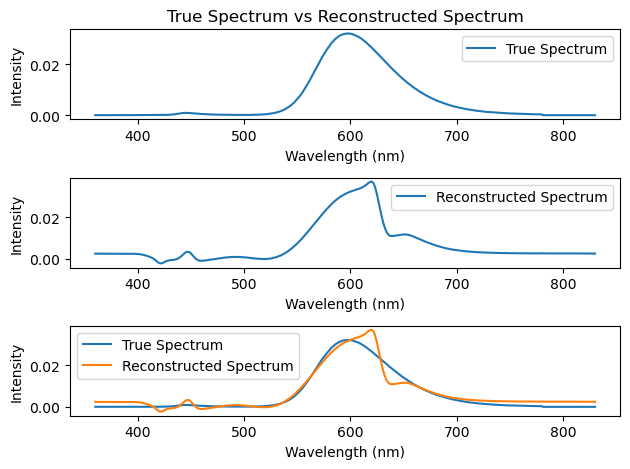

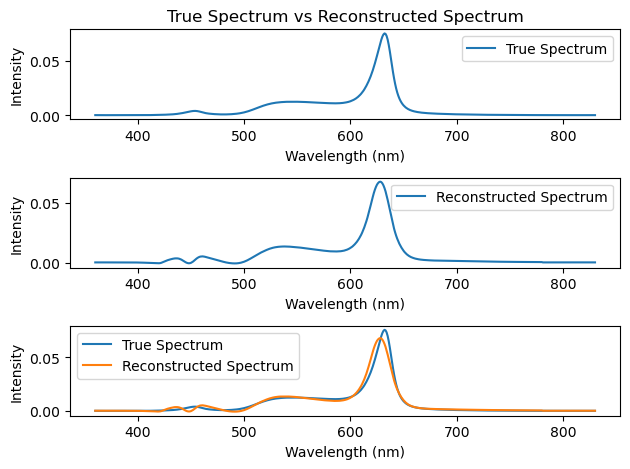

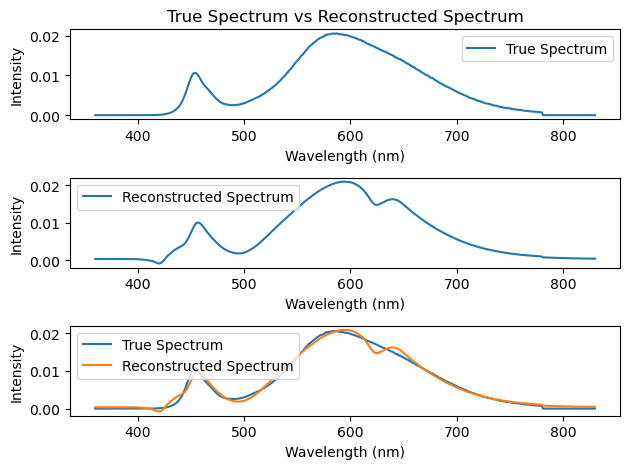

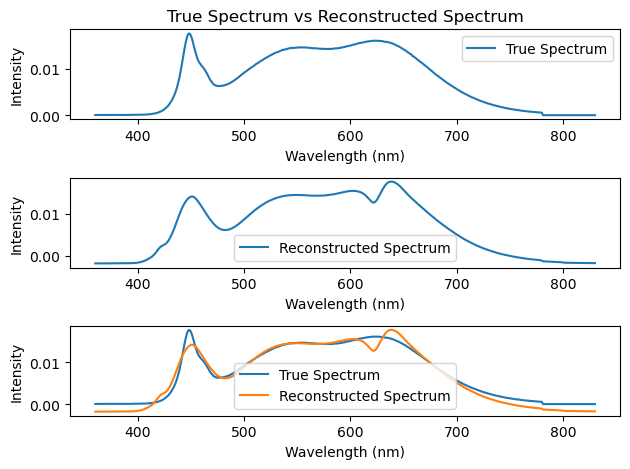

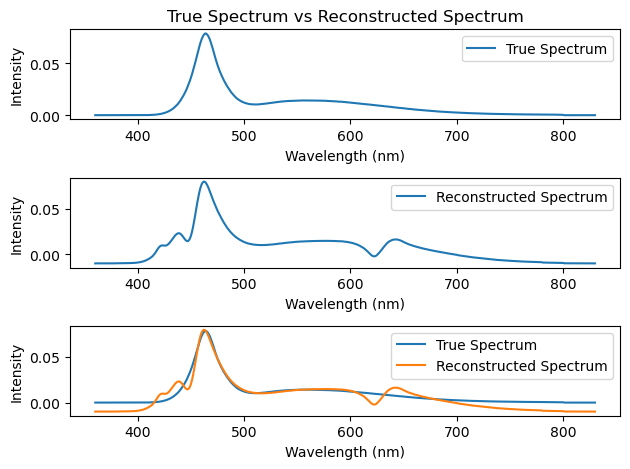

In [13]:
for i in Light_list:
    r.Plot(i, "output_PCA")

In [15]:
def Evaluate(data, re_data, save_path=None, name = None):
        MAE_list = []
        RMSE_list = []
        GFC_list = []

        
        for i in range(1494):
            s = data[:, i]
            s_re = re_data[:, i]
            MAE = np.mean(np.absolute(s - s_re))
            RMSE = np.sqrt(np.mean(np.square(s - s_re)))
            RRMSE = RMSE / np.mean(s_re)

            # GFC
            num = abs(np.sum(s * s_re))
            denom_s = np.sqrt(np.sum(s ** 2) + 1e-9)
            denom_s_re = np.sqrt(np.sum(s_re ** 2) + 1e-9)
            GFC = num / (denom_s * denom_s_re)

            MAE_list.append(MAE)
            RMSE_list.append(RMSE)
            GFC_list.append(GFC)

        MAE_result = np.mean(MAE_list)
        RMSE_result = np.mean(RMSE_list)
        GFC_result = np.mean(GFC_list)


        if save_path:
            with open(save_path, 'a') as f:
                f.write(f"TOTlE: {name}\n")
                f.write(f"MAE_TOTLE: {MAE_result}\n")
                f.write(f"RMSE_TOTLE: {RMSE_result}\n")
                f.write(f"GFC_TOTLE: {GFC_result}\n\n")
            print(f"Results saved to {save_path}")

        return MAE_result, RMSE_result, GFC_result


x = r.reconstructed_spectrum

PCA_MAE, PCA_RMSE, PCA_GFC = Evaluate(spd, x,"output_PCA/results_totle_PCA.txt")

Results saved to output_PCA/results_totle_PCA.txt
